In [1]:
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored

In [2]:
def rankine():
    try:
        # Take input yield stress and factor of stress
        yield_stress = input("Enter the yield or ultimate stress of the material : ")
        yield_stress = abs(int(yield_stress))
        fos = input("Enter the value of factor of safety : ")
        fos = abs(int(fos))

        per_stress = yield_stress / fos

        # Take input stress values
        sigma_x = input("Enter the value of axial stress in X direction : ")
        sigma_y = input("Enter the value of axial stress in Y direction : ")
        tau_xy = input("Enter the value of shear stress : ")
        print("\n")

        # Convert str to int
        sigma_x = int(sigma_x)
        sigma_y = int(sigma_y)
        tau_xy = int(tau_xy)

        # Principal and maximum shear stress values
        p_stress1 = (sigma_x + sigma_y) / 2 +  (((sigma_x - sigma_y) / 2)**2 + tau_xy **2)**0.5
        p_stress2 = (sigma_x + sigma_y) / 2 -  (((sigma_x - sigma_y) / 2)**2 + tau_xy **2)**0.5
        max_shear = (((sigma_x - sigma_y) / 2)**2 + tau_xy **2)**0.5

        print("\nThe value of Principal stresses are ",p_stress1 , " and ", p_stress2)

        # Check material will fail or not
        if (abs(p_stress1) or abs(p_stress2)) > abs(per_stress):
            print(colored("The value of Principal stress is higher than the permissible. \nMaterial will fail !", 'red'))
        else:
            print(colored("The value of Principal stress is within the permissible range. \nMaterial will work !", 'blue'))

        # Plot vertical axis
        if abs(p_stress2) > per_stress:
            y_limit = 1.25*abs(p_stress2)
        else:
            y_limit = 1.25*per_stress
        a = np.linspace(-y_limit, y_limit,100)
        b = a*0
        plt.plot(b, a, color = 'k', linestyle='dashed')

        # Plot horizontal axis
        if abs(p_stress1) >per_stress:
            y_limit = 1.25*abs(p_stress1)
        else:
            y_limit = 1.25*per_stress
        a = np.linspace(-y_limit, y_limit,100)
        b = a*0
        plt.plot(a, b, color = 'k', linestyle='dashed')    

        # Define the coordinates of the permissible stress rectangle
        point1 = [per_stress,per_stress]
        point2 = [per_stress, -per_stress]
        point3 = [-per_stress, -per_stress]
        point4 = [-per_stress, per_stress]

        # Plot the rectangle
        plt.plot((point1[0], point2[0], point3[0], point4[0], point1[0]), (point1[1], point2[1], point3[1], point4[1], point1[0]), '-o', linestyle="--", label = 'Permissible limit')
        plt.plot((p_stress1), (p_stress2), 'o', color = 'r', label = 'P-stress')
        plt.title("Rankine's Theory")
        plt.xlabel('\u03C3'+ "1")
        plt.ylabel('\u03C3'+ "2")
        plt.grid()
        plt.legend()
    
    except Exception as e:
        print(e)
        print("Sorry, that's not a valid input !")

Enter the yield or ultimate stress of the material : 40
Enter the value of factor of safety : 2
Enter the value of axial stress in X direction : 10
Enter the value of axial stress in Y direction : 20
Enter the value of shear stress : 5



The value of Principal stresses are  22.071067811865476  and  7.9289321881345245
The value of Principal stress is higher than the permissible. 
Material will fail !


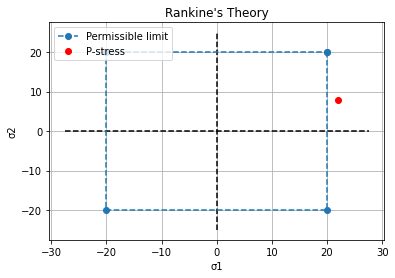

In [3]:
rankine()

Enter the yield or ultimate stress of the material : 40
Enter the value of factor of safety : 2
Enter the value of axial stress in X direction : 10
Enter the value of axial stress in Y direction : 10
Enter the value of shear stress : 2



The value of Principal stresses are  12.0  and  8.0
The value of Principal stress is within the permissible range. 
Material will work !


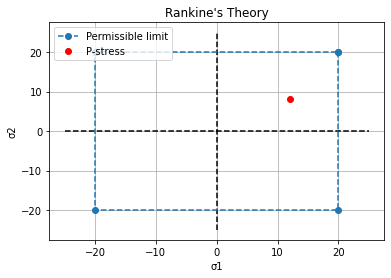

In [4]:
rankine()